### 1. Import dataset & packages

To retrieve the data, it can be loaded using sklearn.dataset library. Simply write down the following lines of code to import iris dataset.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

data = load_iris()

load_iris will output a dictionary. Let's take a look at the keys the dictionary have

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

From here, we can identify that the data key contain the attributes of the dataset and feature_names are the column names. We can utilise Pandas DataFrame function to convert the data and column into a dataframe for our analysis.

In [7]:
df = pd.DataFrame(data = data['data'], columns = data['feature_names'])
df['type'] = data['target']

In [24]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2. Data Wrangling

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
df['flower_type'] = df['type'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,flower_type
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
#view the distribution of flower types
df['flower_type'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: flower_type, dtype: int64

### 3. Data Exploratory Analysis

Questions that I am interested in understanding:

    1) Is there a big difference in Sepal length for each flower?
    2) Which attribute has the greatest effect in predicting the flower type? (correlation)

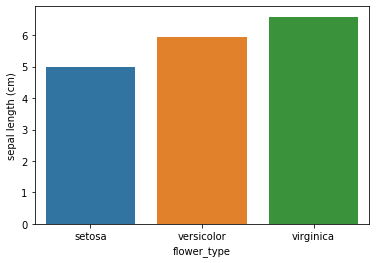

In [49]:
# What is the difference in sepal length for each flower

temp_df = df.groupby('flower_type').mean()[['sepal length (cm)']].reset_index()

sns.barplot(x = 'flower_type', y = 'sepal length (cm)', data = temp_df)

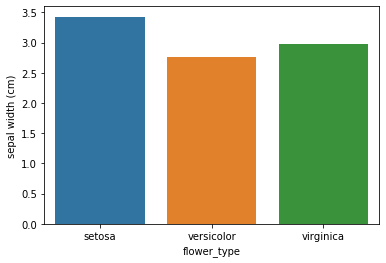

In [51]:
# What is the difference in sepal width for each flower

temp_df = df.groupby('flower_type').mean()[['sepal width (cm)']].reset_index()

sns.barplot(x = 'flower_type', y = 'sepal width (cm)', data = temp_df)

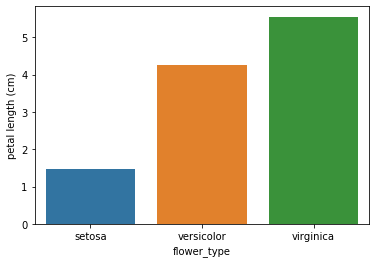

In [52]:
# What is the difference in petal length (cm) for each flower

temp_df = df.groupby('flower_type').mean()[['petal length (cm)']].reset_index()

sns.barplot(x = 'flower_type', y = 'petal length (cm)', data = temp_df)

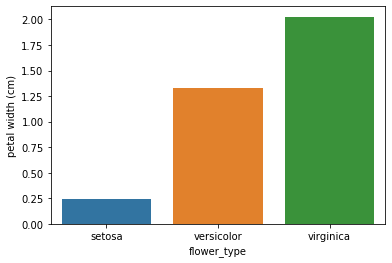

In [53]:
# What is the difference in petal width (cm) for each flower

temp_df = df.groupby('flower_type').mean()[['petal width (cm)']].reset_index()

sns.barplot(x = 'flower_type', y = 'petal width (cm)', data = temp_df)

From the pleminary analysis, it can be observed that the flower "virginica" is the biggest flower compared to the others with the biggest petal length and width, and also for sepal length on average. Like-wise, "setosa" is the smallest flower with a large sepal size. 


This can be a possible predictor in identifying the flower with newer data.

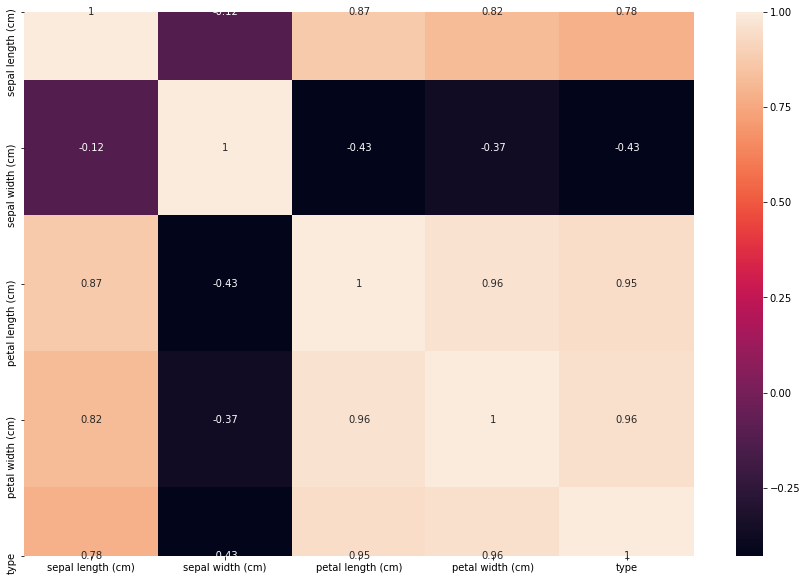

In [70]:
# visualising correlation with heatmap

fig, ax = plt.subplots(figsize = (15,10))

sns.heatmap(df.corr(), ax = ax, annot = True)

#does combininig values increase corr?

From the heatmap above, it can be observed taht the petal width and petal length is a great predictor of the flower type

### 4. Machine Learning Model

In [132]:
import keras
from keras.models import Sequential
from keras.layers import Dense

#preparing for machine learning 
x = df.iloc[:, :-2].values
y = pd.get_dummies(df['type']).values

# split into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

# standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [135]:
# Since it is a mulitclass classification problem, we will be using the softmax activation function
classifier = Sequential()

classifier.add(Dense(input_dim = 4, kernel_initializer = 'uniform', activation = 'relu', units = 8))
classifier.add(Dense(kernel_initializer = 'uniform', activation = 'softmax', units = 3))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = classifier.fit(x_train, y_train, batch_size = 5, epochs = 200, validation_split = 0.1)


#can be done with kfold validation

Train on 108 samples, validate on 12 samples
Epoch 1/200
108/108 [==============================] - 0s 2ms/step - loss: 1.0948 - accuracy: 0.5926 - val_loss: 1.0895 - val_accuracy: 0.5000
Epoch 2/200
108/108 [==============================] - 0s 383us/step - loss: 1.0839 - accuracy: 0.8056 - val_loss: 1.0711 - val_accuracy: 0.9167
Epoch 3/200
108/108 [==============================] - 0s 382us/step - loss: 1.0617 - accuracy: 0.8333 - val_loss: 1.0364 - val_accuracy: 1.0000
Epoch 4/200
108/108 [==============================] - 0s 376us/step - loss: 1.0259 - accuracy: 0.8056 - val_loss: 0.9779 - val_accuracy: 1.0000
Epoch 5/200
108/108 [==============================] - 0s 378us/step - loss: 0.9741 - accuracy: 0.7500 - val_loss: 0.9015 - val_accuracy: 1.0000
Epoch 6/200
108/108 [==============================] - 0s 387us/step - loss: 0.9096 - accuracy: 0.6852 - val_loss: 0.8073 - val_accuracy: 1.0000
Epoch 7/200
108/108 [==============================] - 0s 395us/step - loss: 0.8406 - a

In [136]:
hist_dict = history.history

In [137]:
hist_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

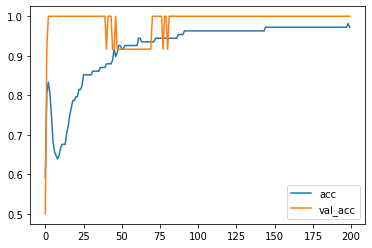

In [144]:
acc = hist_dict['accuracy']
val_acc = hist_dict['val_accuracy']

plt.plot(acc, label ='acc')
plt.plot(val_acc, label = 'val_acc')
plt.legend()

### Great!

We manage to get an accuracy of 97% accuracy in predicting the flowers :D 